In [225]:
#Проект Валитова Аскара. 
#Суть моего проекта в гоночной серии формула 1. В ней часто случается, что одним гонщик доминирует весь сезон и нет никакой интриги
#Поэтому я решил посмотреть, что будет если удалить самую сильную команду из сезона и переназначить очки. Как пример я решил рассмотреть сезоны формулы 1 с 2010 по 2020 год
#Станет ли больше победителей гонок и будет ли битва в личном зачете плотнее. Давайте узнаем.
#Код писал на сайте kaggle и оттуда же загружал нужные датасеты по сезонам формулы 1
#Ссылка на проект https://www.kaggle.com/code/avalitov/pythonproject

In [226]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [227]:
#считаем и приведем все датасеты к 2010 году и позже
race=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/races.csv")
race = race[(race['year'] >= 2010) & (race['year'] <= 2020)]
race

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
336,337,2010,1,3,Bahrain Grand Prix,2010-03-14,12:00:00,http://en.wikipedia.org/wiki/2010_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
337,338,2010,2,1,Australian Grand Prix,2010-03-28,06:00:00,http://en.wikipedia.org/wiki/2010_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
338,339,2010,3,2,Malaysian Grand Prix,2010-04-04,08:00:00,http://en.wikipedia.org/wiki/2010_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
339,340,2010,4,17,Chinese Grand Prix,2010-04-18,06:00:00,http://en.wikipedia.org/wiki/2010_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
340,341,2010,5,4,Spanish Grand Prix,2010-05-09,12:00:00,http://en.wikipedia.org/wiki/2010_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030,1043,2020,13,21,Emilia Romagna Grand Prix,2020-11-01,12:10:00,http://en.wikipedia.org/wiki/2020_Emilia_Romag...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1031,1044,2020,14,5,Turkish Grand Prix,2020-11-15,10:10:00,http://en.wikipedia.org/wiki/2020_Turkish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1032,1045,2020,15,3,Bahrain Grand Prix,2020-11-29,14:10:00,http://en.wikipedia.org/wiki/2020_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1033,1046,2020,16,3,Sakhir Grand Prix,2020-12-06,17:10:00,http://en.wikipedia.org/wiki/2020_Sakhir_Grand...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [228]:
standings = pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv")
standings=standings[standings['raceId'].isin(race['raceId'])] 
standings=standings.sort_values(by='raceId')
standings.tail()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
32902,70207,1047,807,10.0,15,15,0
32901,70208,1047,851,0.0,22,22,0
32922,70188,1047,844,98.0,8,8,0
32911,70190,1047,1,347.0,1,1,11
32923,70187,1047,822,223.0,2,2,2


In [229]:
drivers=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv")
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [230]:
results=pd.read_csv("/kaggle/input/formula-1-world-championship-1950-2020/results.csv")
results=results[results['raceId'].isin(race['raceId'])]
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
20320,20323,337,4,6,8,3,1,1,1,25.0,49,1:39:20.396,5960396,45,1,1:58.287,191.706,1
20321,20324,337,13,6,7,2,2,2,2,18.0,49,+16.099,5976495,38,5,1:59.732,189.392,1
20322,20325,337,1,1,2,4,3,3,3,15.0,49,+23.182,5983578,42,4,1:59.560,189.665,1
20323,20326,337,20,9,5,1,4,4,4,12.0,49,+38.799,5999195,32,12,2:00.218,188.627,1
20324,20327,337,3,131,4,5,5,5,5,10.0,49,+40.213,6000609,45,13,2:00.236,188.599,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24955,24961,1047,841,51,99,14,16,16,16,0.0,54,\N,\N,29,7,1:41.675,196.650,11
24956,24962,1047,849,3,6,18,17,17,17,0.0,54,\N,\N,49,16,1:42.497,195.073,11
24957,24963,1047,825,210,20,20,18,18,18,0.0,54,\N,\N,50,13,1:41.999,196.025,11
24958,24964,1047,850,210,51,17,19,19,19,0.0,53,\N,\N,50,8,1:41.707,196.588,12


In [231]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [232]:
#воспользуемся sql, чтобы соединить таблицы race и standings

%reload_ext sql
import sqlite3
conn = sqlite3.connect('example.db')
race.to_sql('race', conn, if_exists='replace', index=False)
standings.to_sql('standings', conn, if_exists='replace', index=False)
results.to_sql('results', conn, if_exists='replace', index=False)
conn.close()
%sql sqlite:///example.db

In [233]:
race_standings = %sql SELECT r.raceId, s.driverId, r.year, s.wins, s.points, s.position FROM race r JOIN standings s ON r.raceId = s.raceId

 * sqlite:///example.db
Done.


In [234]:
race_standings=pd.DataFrame(race_standings)
race_standings.to_csv('race_standings.csv', index=False)
race_standings

,raceId,driverId,year,wins,points,position
0,337,1,2010,0,15.0,3
1,337,3,2010,0,10.0,5
2,337,4,2010,1,25.0,1
3,337,5,2010,0,0.0,15
4,337,9,2010,0,0.0,11
...,...,...,...,...,...,...
4845,1047,847,2020,0,3.0,18
4846,1047,848,2020,0,105.0,7
4847,1047,849,2020,0,0.0,21
4848,1047,850,2020,0,0.0,23


In [235]:
#Выберем только тех гонщиков, кто участвовал в гонках хотя бы раз с 2010 по 2020
drivers = drivers[drivers['driverId'].isin(race_standings['driverId'])]
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
845,847,russell,63,RUS,George,Russell,1998-02-15,British,http://en.wikipedia.org/wiki/George_Russell_(r...
846,848,albon,23,ALB,Alexander,Albon,1996-03-23,Thai,http://en.wikipedia.org/wiki/Alexander_Albon
847,849,latifi,6,LAT,Nicholas,Latifi,1995-06-29,Canadian,http://en.wikipedia.org/wiki/Nicholas_Latifi
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi


In [236]:
conn = sqlite3.connect('example.db')
race_standings.to_sql('race_standings', conn, if_exists='replace', index=False)
conn.close()
%sql sqlite:///example.db
race_results_standings = %sql SELECT DISTINCT r.year, r.raceId, r.driverId, s.constructorId, s.position as race_position, s.points as race_points, r.points as season_points, r.position as champ_position, r.wins FROM race_standings r JOIN results s ON r.raceId = s.raceId AND r.driverId = s.driverId

race_results_standings_df = pd.DataFrame(race_results_standings)
race_results_standings_df.to_csv('race_results_standings.csv', index=False)
race_results_standings_df

 * sqlite:///example.db
Done.


,year,raceId,driverId,constructorId,race_position,race_points,season_points,champ_position,wins
0,2010,337,1,1,3,15.0,15.0,3,0
1,2010,337,3,131,5,10.0,10.0,5,0
2,2010,337,4,6,1,25.0,25.0,1,1
3,2010,337,5,205,15,0.0,0.0,15,0
4,2010,337,9,4,11,0.0,0.0,11,0
...,...,...,...,...,...,...,...,...,...
4628,2020,1047,846,1,5,10.0,97.0,9,0
4629,2020,1047,847,3,15,0.0,3.0,18,0
4630,2020,1047,848,9,4,12.0,105.0,7,0
4631,2020,1047,849,3,17,0.0,0.0,21,0


In [237]:
conn = sqlite3.connect('example.db')
drivers.to_sql('drivers', conn, if_exists='replace', index=False)
race_results_standings_df.to_sql('race_results_standings_df', conn, if_exists='replace', index=False)
conn.close()
%sql sqlite:///example.db

In [238]:
race_info = %sql SELECT DISTINCT r.year, r.raceId, r.driverId, r.constructorId, r.race_position, d.code, r.race_points, r.season_points, r.champ_position,  r.wins FROM race_results_standings_df r JOIN drivers d ON r.driverId = d.driverId

race_info = pd.DataFrame(race_info)
#Объединили всю нужную информацию в один датасет race_info

 * sqlite:///example.db
Done.


In [239]:
race_info[race_info['year']==2010]

,year,raceId,driverId,constructorId,race_position,code,race_points,season_points,champ_position,wins
0,2010,337,1,1,3,HAM,15.0,15.0,3,0
1,2010,337,3,131,5,ROS,10.0,10.0,5,0
2,2010,337,4,6,1,ALO,25.0,25.0,1,1
3,2010,337,5,205,15,KOV,0.0,0.0,15,0
4,2010,337,9,4,11,KUB,0.0,0.0,11,0
...,...,...,...,...,...,...,...,...,...,...
451,2010,355,155,15,14,KOB,0.0,32.0,12,0
452,2010,355,807,3,16,HUL,0.0,22.0,14,0
453,2010,355,808,4,6,PET,8.0,27.0,13,0
454,2010,355,810,166,18,DIG,0.0,0.0,24,0


In [240]:
#Функция для определения количества победителей в год
def winners_number(race_info, year):
    number=0
    winners=[]
    
    race_year = race_info[race_info['year'] == year]
    max_race = race_year['raceId'].max()
    race_year = race_year[race_year['raceId'] == max_race]
    number = (race_year['wins'] > 0).sum()
    
    for i in range(len(race_year)):
        if race_year['wins'].iloc[i] > 0:
            winners.append([race_year['code'].iloc[i], race_year['wins'].iloc[i]])
    return number, winners

In [241]:
year_2010, winners =winners_number(race_info, 2010)
winners

[['HAM', 3], ['ALO', 5], ['WEB', 4], ['BUT', 2], ['VET', 5]]

In [242]:
def plotwinner_num(race_info, start_year, end_year):
    years = range(start_year, end_year+1)
    winner_counts = []

    for year in years:
        number, _ = winners_number(race_info, year)
        winner_counts.append(number)
        
    plt.bar(years, winner_counts)
    plt.xlabel('Year')
    plt.ylabel('Number of Winners')
    plt.title('Number of Winners per Year from 2010 to 2020')
    plt.show()

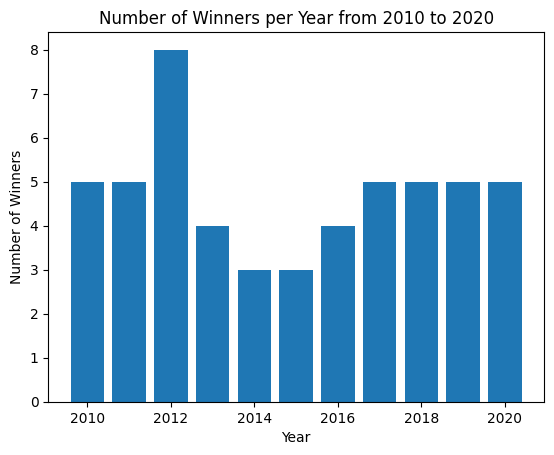

In [243]:
decade_winners=plotwinner_num(race_info, 2010, 2020)

In [244]:
#Функция для определения топ 3 гонщиков сезона по очкам
def top3racers(race_info, year):
    driver=[]
    points=[]
    
    race_year = race_info[race_info['year'] == year]
    max_race = race_year['raceId'].max()
    race_year = race_year[race_year['raceId'] == max_race]
    race_year=race_year.sort_values(by='season_points', ascending=False)
    
    for i in range(3):
        driver.append(race_year['code'].iloc[i])
        points.append(race_year['season_points'].iloc[i])
    return driver, points

        

In [245]:
year=2010
driver,points=top3racers(race_info,year)
print(driver, points)

['VET', 'ALO', 'WEB'] [256.0, 252.0, 242.0]


In [246]:
def plot_top3drivers(race_info, start_year, end_year):
    all_data=[]
    years = range(start_year, end_year + 1)
    for year in years:
        drivers, points = top3racers(race_info, year)
        for driver, point in zip(drivers, points):
            all_data.append([year, driver, point])

    df = pd.DataFrame(all_data, columns=['year', 'driver', 'points'])
    
    plt.figure(figsize=(14, 8))
    unique_years = df['year'].unique()
    bar_width = 0.2
    group_width = bar_width * 3 + 0.3  # Расстояние между группами увеличено
    bar_positions = np.arange(len(unique_years)) * group_width

    for i in range(3):  # Только 3 лучших гонщика
        positions = bar_positions + i * bar_width
        subset = df.groupby('year').nth(i)
        plt.bar(positions, subset['points'], bar_width, label=f'Top {i+1}')

    plt.xlabel('Year')
    plt.ylabel('Season Points')
    plt.title('Top 3 Racers in season and Their Points')
    plt.xticks(bar_positions + bar_width, unique_years)
    plt.legend()

    plt.show()

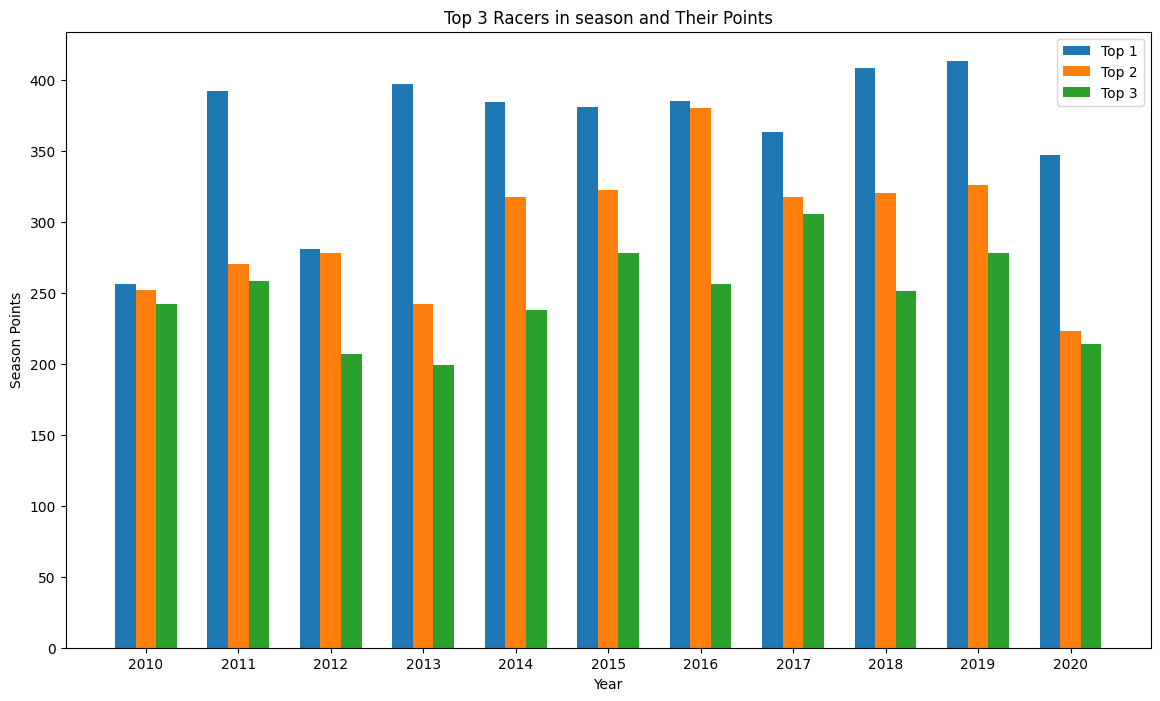

In [247]:
decade=plot_top3drivers(race_info,2010,2020)
decade

In [248]:
#Теперь найдем и уберем из датасета побеждавшую команду и ее гонщиков и сравним стало ли интереснее

In [249]:
race_info_new=race_info.copy()

In [250]:
def get_champions_per_year(race_info):
    idx = race_info.groupby('year')['season_points'].idxmax()
    champions = race_info.loc[idx, ['year', 'code', 'season_points', 'constructorId']]
    return champions

champions = get_champions_per_year(race_info_new)

for _, row in champions.iterrows():
    year = row['year']
    constructor_id = row['constructorId']
    race_info_new = race_info_new[~((race_info_new['year'] == year) & (race_info_new['constructorId'] == constructor_id))]

In [251]:
race_info_new

,year,raceId,driverId,constructorId,race_position,code,race_points,season_points,champ_position,wins
0,2010,337,1,1,3,HAM,15.0,15.0,3,0
1,2010,337,3,131,5,ROS,10.0,10.0,5,0
2,2010,337,4,6,1,ALO,25.0,25.0,1,1
3,2010,337,5,205,15,KOV,0.0,0.0,15,0
4,2010,337,9,4,11,KUB,0.0,0.0,11,0
...,...,...,...,...,...,...,...,...,...,...
4628,2020,1047,846,1,5,NOR,10.0,97.0,9,0
4629,2020,1047,847,3,15,RUS,0.0,3.0,18,0
4630,2020,1047,848,9,4,ALB,12.0,105.0,7,0
4631,2020,1047,849,3,17,LAT,0.0,0.0,21,0


In [252]:
#Обнулим все победы и очки
race_info_new['wins']=0
race_info_new['race_points']=0
race_info_new['season_points']=0

In [253]:
race_info_new['race_position'] = race_info_new['race_position'].replace('\\N', 20)
race_info_new['race_position'] = pd.to_numeric(race_info_new['race_position'], errors='coerce')
race_info_new = race_info_new.dropna(subset=['race_position']) 
race_info_new['race_position'] = race_info_new['race_position'].astype(int)
race_info_new=race_info_new.sort_values(by=['raceId','race_position'], ascending=[True, True])
race_info_new
race_info_new['raceId'] = race_info_new['raceId'].astype(int)

In [254]:
#Переопределим позиции с учетом удаленных гонщиков

position = 1
raceId = race_info_new.iloc[0]['raceId']

for i, row in race_info_new.iterrows():
    if row['raceId'] == raceId:
        race_info_new.at[i, 'race_position'] = position
        position += 1
    elif row['raceId'] - raceId == 1:
        raceId = row['raceId']
        position = 1
        race_info_new.at[i, 'race_position'] = position
        position += 1
    elif row['raceId'] - raceId > 1:
        raceId = row['raceId']
        position = 1
        race_info_new.at[i, 'race_position'] = position
        position += 1
    

In [255]:
points_distribution = {1: 25, 2: 18, 3: 15, 4: 12, 5: 10, 6: 8, 7: 6, 8: 4, 9: 2, 10: 1}

# Функция для присвоения очков за гонку и обновления очков за сезон
def update_points(group):
    group['race_points'] = group['race_position'].apply(lambda x: points_distribution.get(x, 0))
    return group

race_info_new = race_info_new.groupby('raceId').apply(update_points).reset_index(drop=True)
race_info_new

/tmp/ipykernel_33/1677247645.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_info_new = race_info_new.groupby('raceId').apply(update_points).reset_index(drop=True)


,year,raceId,driverId,constructorId,race_position,code,race_points,season_points,champ_position,wins
0,2010,337,4,6,1,ALO,25,0,1,0
1,2010,337,13,6,2,MAS,18,0,2,0
2,2010,337,1,1,3,HAM,15,0,3,0
3,2010,337,3,131,4,ROS,12,0,5,0
4,2010,337,30,131,5,MSC,10,0,6,0
...,...,...,...,...,...,...,...,...,...,...
4198,2020,1047,841,51,14,GIO,0,0,17,0
4199,2020,1047,849,3,15,LAT,0,0,21,0
4200,2020,1047,825,210,16,MAG,0,0,20,0
4201,2020,1047,850,210,17,FIT,0,0,23,0


In [256]:
race_info_new = race_info_new.sort_values(by=['driverId', 'year', 'raceId']).reset_index(drop=True)

#Формирование столбца очков сезона каждого гонщика по мере прохождения чемпионата

for i, row in race_info_new.iterrows():
    if i > 0 and row['driverId'] == race_info_new.at[i-1, 'driverId'] and row['year'] == race_info_new.at[i-1, 'year']:
        race_info_new.at[i, 'season_points'] = race_info_new.at[i-1, 'season_points'] + race_info_new.at[i, 'race_points']
    else:
        race_info_new.at[i, 'season_points'] = race_info_new.at[i, 'race_points']


In [257]:
#Формирование столбца побед каждого гонщика по мере прохождения сезона
for i, row in race_info_new.iterrows():
    if i > 0 and row['driverId'] == race_info_new.at[i-1, 'driverId'] and row['year'] == race_info_new.at[i-1, 'year']:
        if row['race_position'] == 1:
            race_info_new.at[i, 'wins'] = race_info_new.at[i-1, 'wins'] + 1
        else:
            race_info_new.at[i, 'wins'] = race_info_new.at[i-1, 'wins']
    else:
        if row['race_position'] == 1:
            race_info_new.at[i, 'wins'] = 1
        else:
            race_info_new.at[i, 'wins'] = 0
            

In [258]:
race_info_new = race_info_new.sort_values(by=['raceId', 'race_position']).reset_index(drop=True)
race_info_new
#Наш обновленный датафрейм готов

,year,raceId,driverId,constructorId,race_position,code,race_points,season_points,champ_position,wins
0,2010,337,4,6,1,ALO,25,25,1,1
1,2010,337,13,6,2,MAS,18,18,2,0
2,2010,337,1,1,3,HAM,15,15,3,0
3,2010,337,3,131,4,ROS,12,12,5,0
4,2010,337,30,131,5,MSC,10,10,6,0
...,...,...,...,...,...,...,...,...,...,...
4198,2020,1047,841,51,14,GIO,0,14,17,0
4199,2020,1047,849,3,15,LAT,0,6,21,0
4200,2020,1047,825,210,16,MAG,0,6,20,0
4201,2020,1047,850,210,17,FIT,0,0,23,0


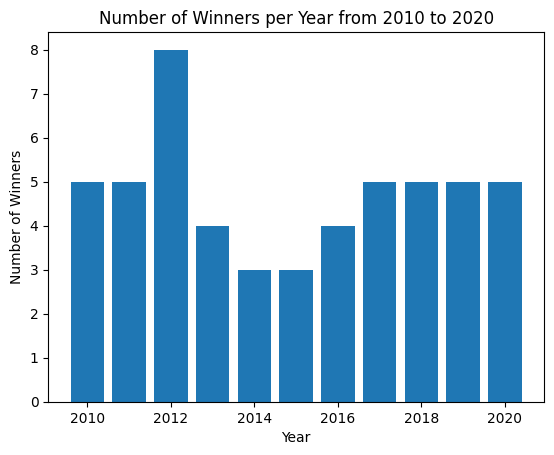

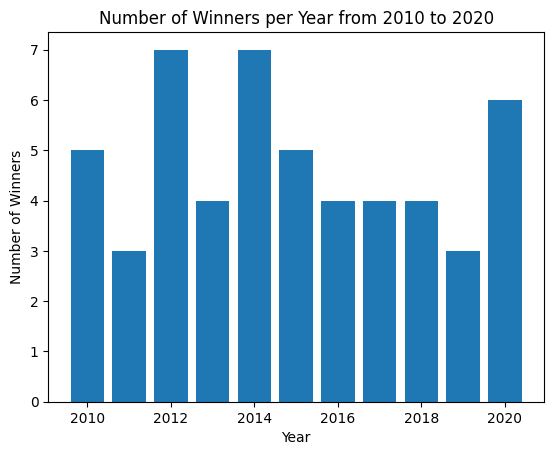

In [259]:
#Посмотрим и сравним победы до и после изменений 
decade_winners=plotwinner_num(race_info, 2010, 2020)
decade_winners_new=plotwinner_num(race_info_new, 2010, 2020)

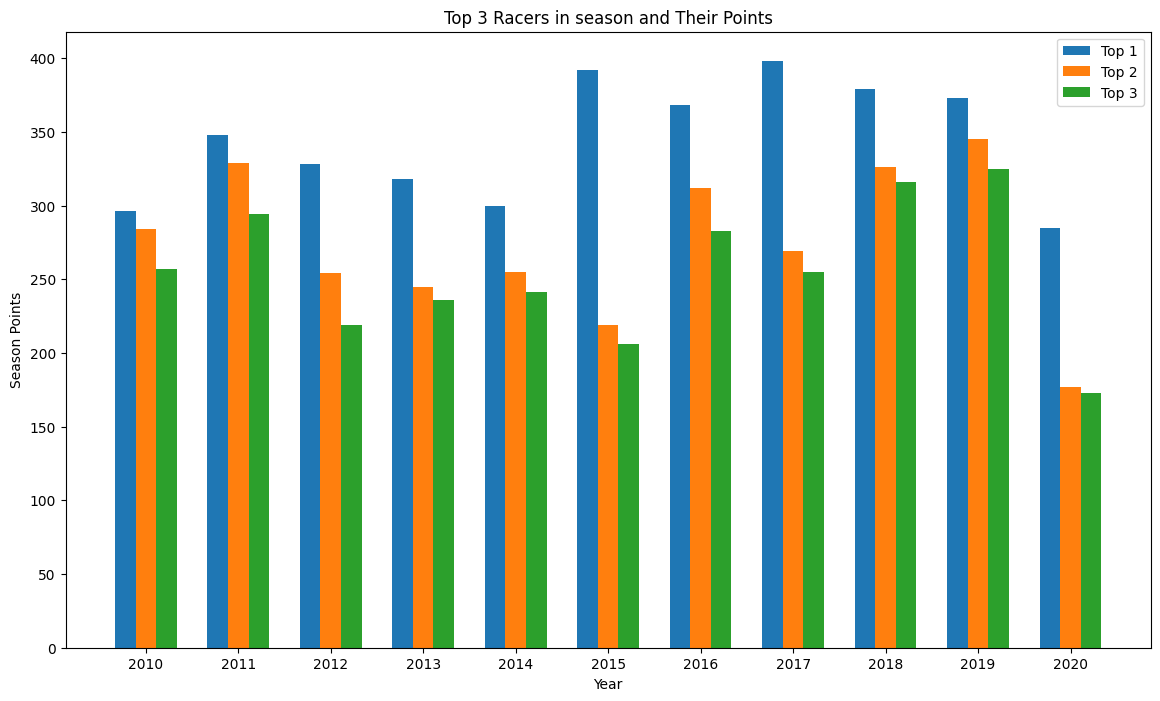

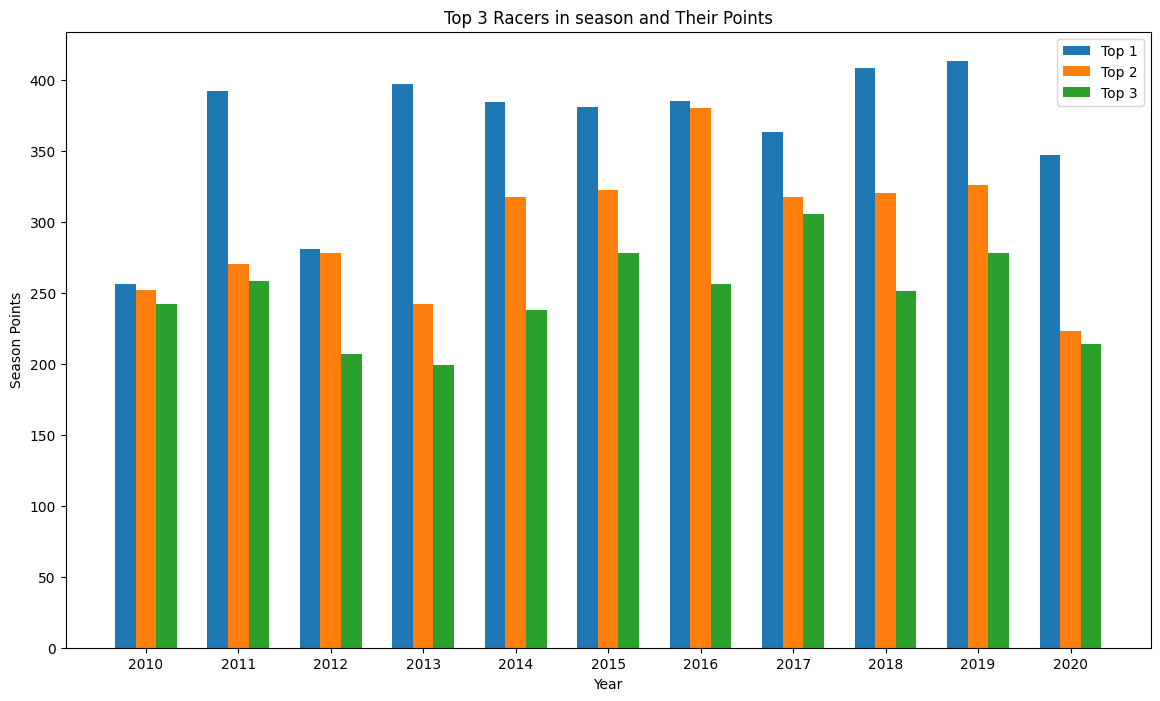

In [260]:
#Посмотрим и сравним количества очков для первых 3 гонщиков
decade_new=plot_top3drivers(race_info_new,2010,2020)
decade=plot_top3drivers(race_info,2010,2020)

In [261]:
#В результате можно сказать, что удаление самой сильной команды и их гонщиков не сильно влияет на результат, так как общее количество побед в сезоне не сильно изменилось
#Количество разных победителей уменьшилось в 5 сезонах, а увеличилось в 3
#Аналогично можно сказать про распределение первой тройки, более плотной борьбы не добавилось и после удаления лучших гонщиков, начинают доминировать другие
#Следовательно, удаление самой сильной команды не сделает чемпионат интереснее и не сделает борьбу более плотной.